In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
INPUT_DATA = "../data/POWER_Point_Hourly_20111231_20210101_001d7523N_127d9942E_LST.csv"

In [ ]:
with open(INPUT_DATA, "r") as f:
    text = ''
    texts = []
    nrows_header = 0
    while "-END HEADER-" not in text:
        text = f.readline()
        print(text.strip('\n'))
        texts.append(text)
        nrows_header += 1

-BEGIN HEADER-
NASA/POWER CERES/MERRA2 Native Resolution Hourly Data 
Dates (month/day/year): 12/31/2011 through 01/01/2021 
Location: Latitude  1.7523   Longitude 127.9942 
Elevation from MERRA-2: Average for 0.5 x 0.625 degree lat/lon region = 37.91 meters
The value for missing source data that cannot be computed or is outside of the sources availability range: -999 
Parameter(s): 
ALLSKY_SFC_SW_DWN     CERES SYN1deg All Sky Surface Shortwave Downward Irradiance (Wh/m^2) 
CLRSKY_SFC_SW_DWN     CERES SYN1deg Clear Sky Surface Shortwave Downward Irradiance (Wh/m^2) 
SZA                   CERES SYN1deg Solar Zenith Angle (Degrees) 
-END HEADER-


In [ ]:
df = pd.read_csv("../data/POWER_Point_Hourly_20111231_20210101_001d7523N_127d9942E_LST.csv",
                 skiprows=nrows_header)

for i, v in df['HR'].items():
    if v == 23:
        break

df = df[i+1:i-23]  # slcie to start from 0 and end at 23
df.head()

,YEAR,MO,DY,HR,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,SZA
15,2012,1,1,0,0.0,0.0,-999.0
16,2012,1,1,1,0.0,0.0,-999.0
17,2012,1,1,2,0.0,0.0,-999.0
18,2012,1,1,3,0.0,0.0,-999.0
19,2012,1,1,4,0.0,0.0,-999.0


In [ ]:
def get_hourly_solar_capacity_factor(GHI, capacity, A=1.63350, r=0.159, miu=0.9):
    """Get hourly solar capacity factor

    Args:
        GHI (_type_): Hourly Global Horizontal Irradiation (W / m2).
        capacity (_type_): Maximum power output of the installed solar panel (Wp).
        A (float, optional): Total solar panel area (m2). Defaults to 1.63350.
        r (float, optional): Solar panel efficiency. Defaults to 0.159.
        miu (float, optional): Coefficient for losses. Defaults to 0.9.
    """
    return (get_hourly_solar_energy(GHI=GHI, A=A, r=r, miu=miu)
            / capacity)

def get_hourly_solar_energy(GHI, A=1.63350, r=0.159, miu=0.9):
    """Get hourly solar capacity factor

    Args:
        GHI (_type_): Hourly Global Horizontal Irradiation (W / m2).
        A (float, optional): Total solar panel area (m2). Defaults to 1.63350.
        r (float, optional): Solar panel efficiency. Defaults to 0.159.
        miu (float, optional): Coefficient for losses. Defaults to 0.9.
    """
    return A * r * GHI * miu

In [ ]:
pout = get_hourly_solar_energy(df['ALLSKY_SFC_SW_DWN'])

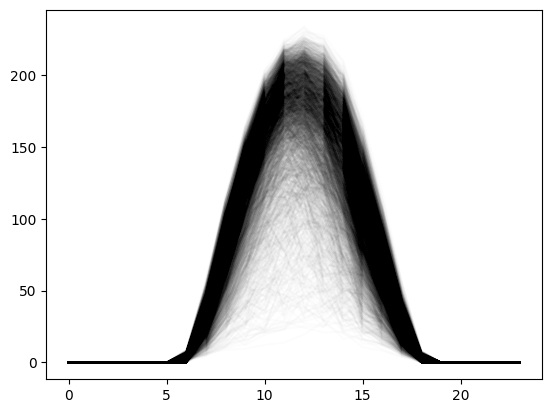

In [ ]:
plt.plot(pout.values.reshape(-1, 24).T, 'k-', alpha=0.01)
plt.show()

In [ ]:
cf = get_hourly_solar_capacity_factor(df['ALLSKY_SFC_SW_DWN'], 260) 

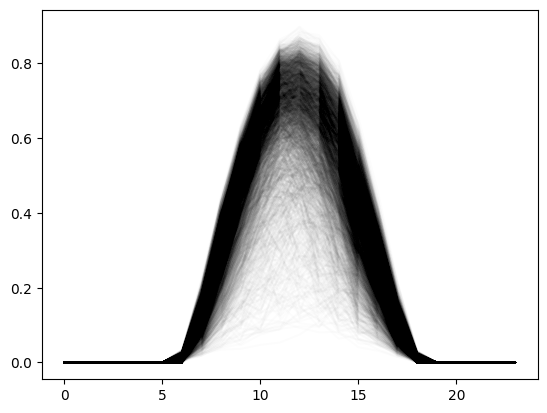

In [ ]:
plt.plot(cf.values.reshape(-1, 24).T, 'k-', alpha=0.01)
plt.show()

In [ ]:
df['ALLSKY_SFC_CF'] = cf
df['ALLSKY_SFC_POUT'] = pout
df.head()

,YEAR,MO,DY,HR,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,SZA,ALLSKY_SFC_CF,ALLSKY_SFC_POUT
15,2012,1,1,0,0.0,0.0,-999.0,0.0,0.0
16,2012,1,1,1,0.0,0.0,-999.0,0.0,0.0
17,2012,1,1,2,0.0,0.0,-999.0,0.0,0.0
18,2012,1,1,3,0.0,0.0,-999.0,0.0,0.0
19,2012,1,1,4,0.0,0.0,-999.0,0.0,0.0


In [ ]:
with open(f"{INPUT_DATA[:-4]}_processed.csv", 'w') as f:
    for text in texts:
        f.write(text)
    df.to_csv(f, index=False, line_terminator='\n')